<a href="https://colab.research.google.com/github/DanielEXT10/AI/blob/main/Maquinas_de_Soporte_Vectorial_y_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maquinas de Soporte Vectorial y Redes Neuronales

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
#style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline


In [ ]:
test = pd.read_csv('/content/test.csv')
train = pd.read_csv('/content/train.csv')

In [ ]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

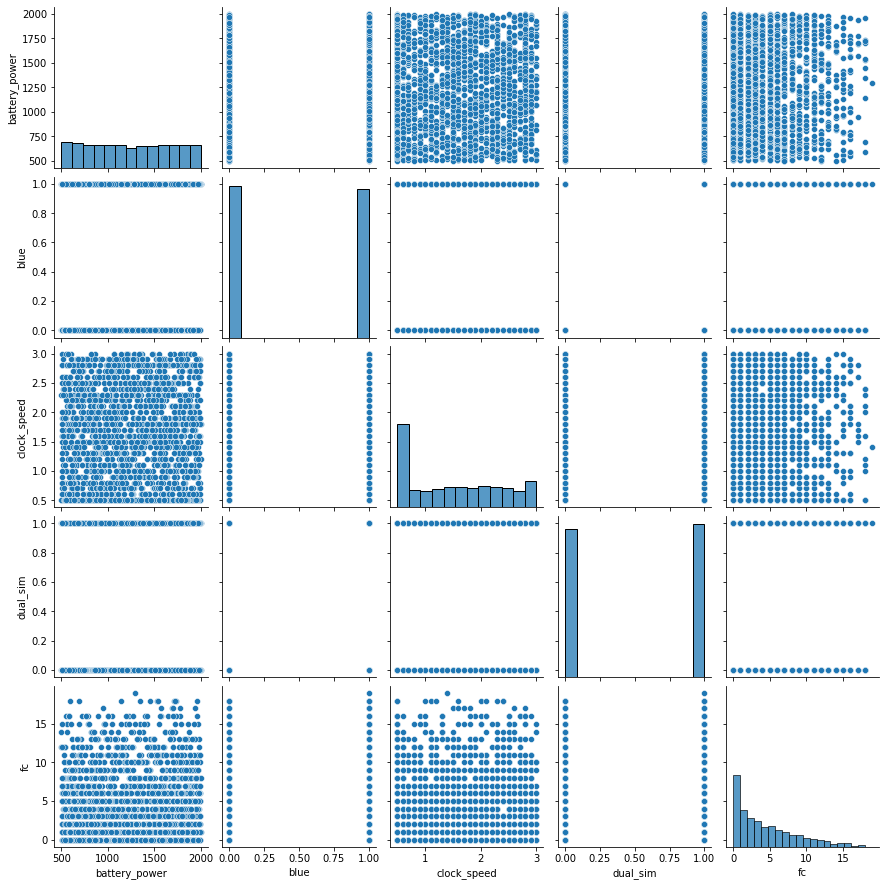

In [ ]:
#Generar todos los pares de scatterplot para las caracteristicas
sns.pairplot(train.iloc[:,:5])

(array([320., 213., 199., 168., 205., 186., 200., 208., 195., 106.]),
 array([0.1 , 0.19, 0.28, 0.37, 0.46, 0.55, 0.64, 0.73, 0.82, 0.91, 1.  ]),
 <a list of 10 Patch objects>)

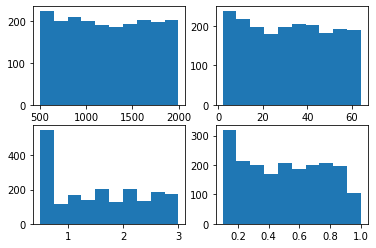

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


ax1.hist(train['battery_power'])
ax2.hist(train['int_memory'])
ax3.hist(train['clock_speed'])
ax4.hist(train['m_dep'])


In [ ]:
features = train.columns
features

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})

In [ ]:
correlation = train.corr(method= 'spearman')
correlation

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011273,0.009161,-0.042033,0.034931,0.015399,-0.003748,0.033412,0.001752,-0.029800,...,0.009490,-0.009040,-0.001285,-0.029283,-0.026544,0.052730,0.011820,-0.010334,-0.008464,0.199991
blue,0.011273,1.000000,0.017336,0.035198,0.001095,0.013443,0.040559,0.002793,-0.008277,0.036424,...,-0.004211,-0.041127,0.026130,-0.002838,0.007520,0.013777,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.009161,0.017336,1.000000,-0.002278,-0.005288,-0.042833,0.005447,-0.014712,0.010773,-0.008159,...,-0.013043,-0.008619,0.004119,-0.030092,-0.015129,-0.012699,-0.044189,0.018471,-0.023710,-0.005436
dual_sim,-0.042033,0.035198,-0.002278,1.000000,-0.038122,0.003187,-0.015557,-0.021461,-0.009260,-0.024531,...,-0.017916,0.014149,0.041059,-0.012950,-0.022316,-0.039379,-0.014008,-0.017117,0.022740,0.017444
fc,0.034931,0.001095,-0.005288,-0.038122,1.000000,-0.023770,-0.027282,0.012780,0.027134,-0.015530,...,-0.020919,-0.009170,0.019897,-0.009578,-0.001169,-0.001404,-0.013806,-0.016291,0.006774,0.024167
four_g,0.015399,0.013443,-0.042833,0.003187,-0.023770,1.000000,0.008218,-0.000179,-0.016318,-0.030052,...,-0.022800,0.007862,0.006839,0.026659,0.035122,-0.046537,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.003748,0.040559,0.005447,-0.015557,-0.027282,0.008218,1.000000,0.007380,-0.034259,-0.028375,...,-0.001568,-0.008511,0.033061,0.040244,0.015987,-0.002436,-0.009764,-0.028446,0.007725,0.044278
m_dep,0.033412,0.002793,-0.014712,-0.021461,0.012780,-0.000179,0.007380,1.000000,0.022438,-0.004791,...,0.026156,0.023180,-0.010398,-0.023964,-0.019489,0.016665,-0.011113,-0.001134,-0.028987,-0.000322
mobile_wt,0.001752,-0.008277,0.010773,-0.009260,0.027134,-0.016318,-0.034259,0.022438,1.000000,-0.019437,...,0.011230,0.000783,-0.002731,-0.033955,-0.018952,0.006343,0.001350,-0.014523,-0.000190,-0.030214
n_cores,-0.029800,0.036424,-0.008159,-0.024531,-0.015530,-0.030052,-0.028375,-0.004791,-0.019437,1.000000,...,-0.004529,0.024329,0.005118,0.000575,0.029032,0.013359,-0.015211,0.023807,-0.009813,0.004651


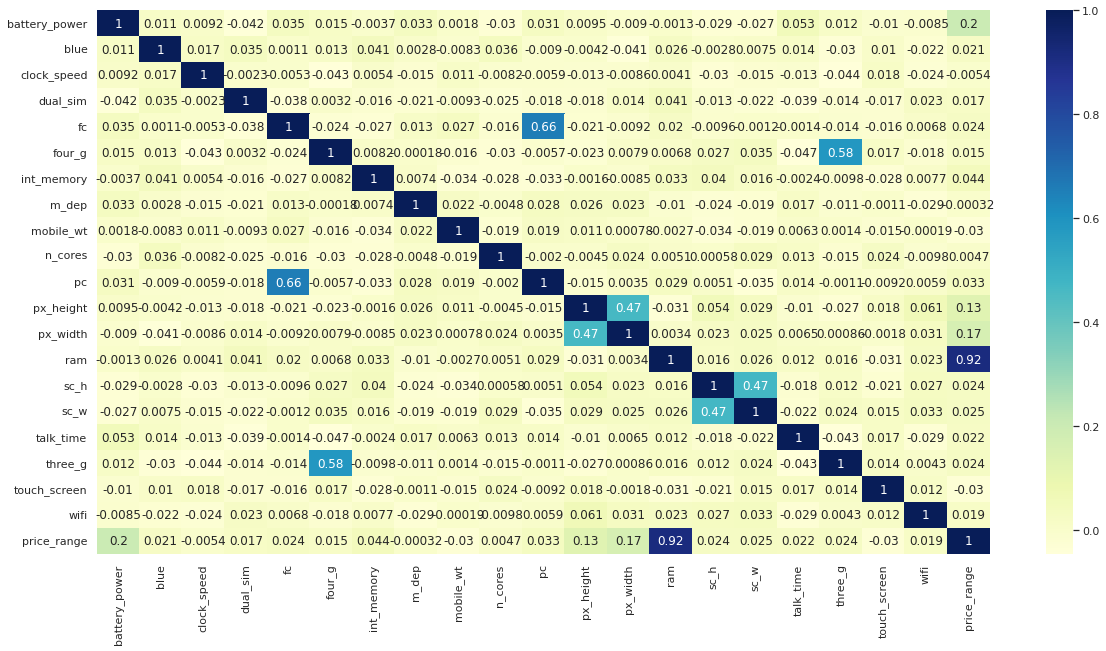

In [ ]:
sns.heatmap(correlation, annot= True, cmap='YlGnBu')

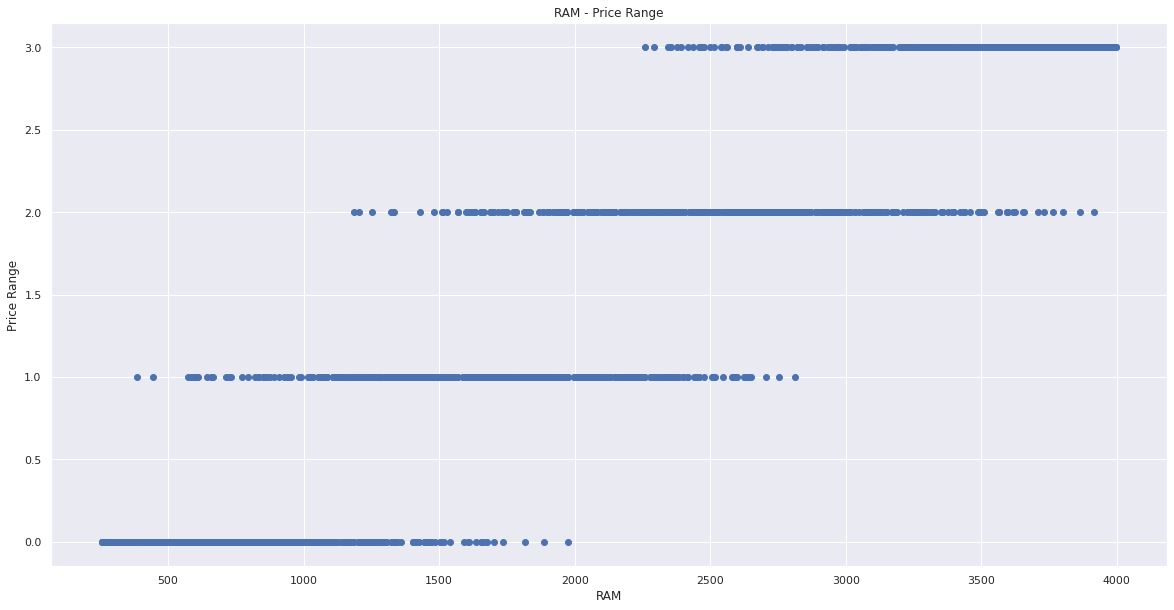

In [ ]:
plt.scatter(train['ram'],train['price_range'])
plt.title('RAM - Price Range')
plt.xlabel('RAM')
plt.ylabel('Price Range')
plt.show()

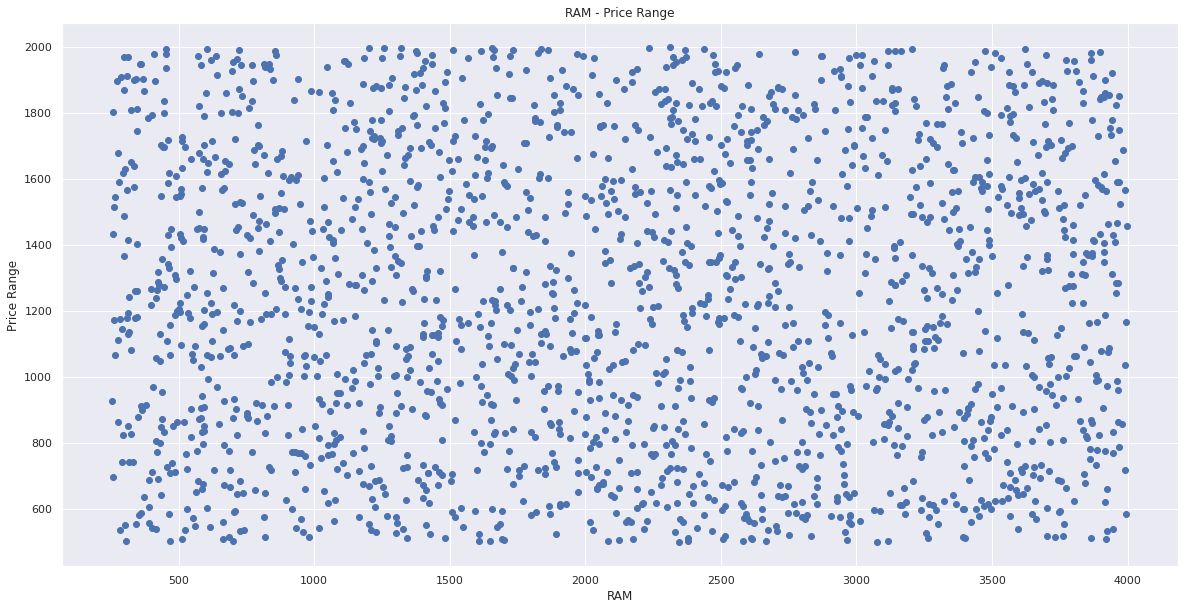

In [ ]:
plt.scatter(train['ram'],train['battery_power'])
plt.title('RAM - Price Range')
plt.xlabel('RAM')
plt.ylabel('Price Range')
plt.show()

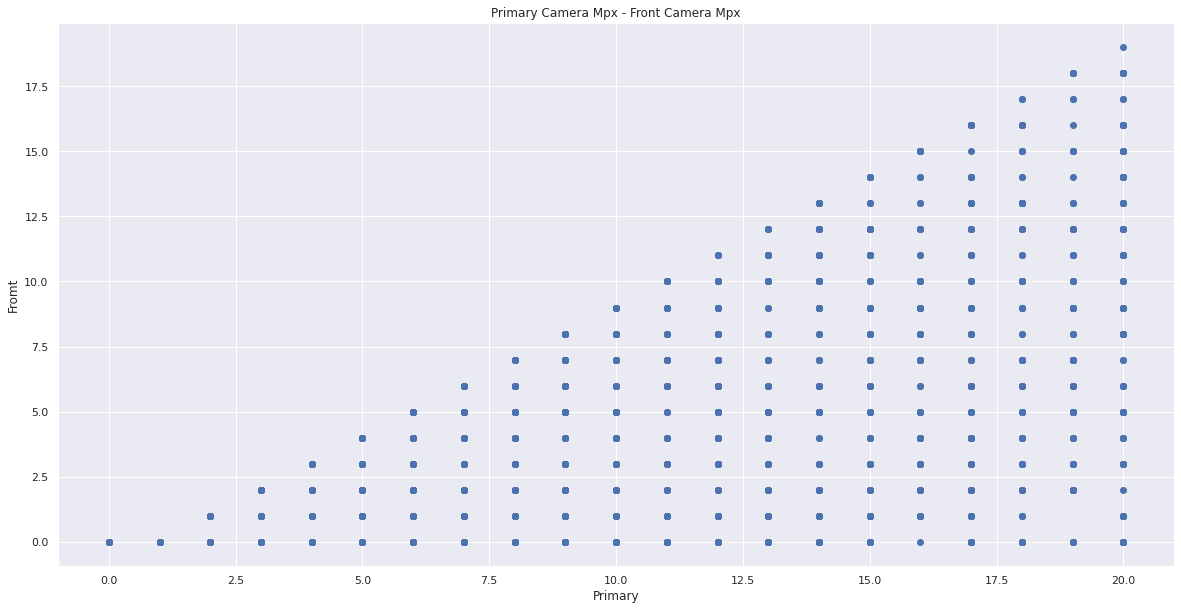

In [ ]:
plt.scatter(train['pc'],train['fc'])
plt.title('Primary Camera Mpx - Front Camera Mpx')
plt.xlabel('Primary')
plt.ylabel('Fromt')
plt.show()

## Clasificacion
Dividimos la data en x para las caracteristicas o variables independentientes, y 'y' para la variable dependiente que en este caso seria el rango de precio.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
x = train.iloc[:,:-1]
y = train['price_range']

In [ ]:
from sklearn.model_selection import train_test_split

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [ ]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [ ]:
x_train,x_test, y_train,y_test = train_test_split(x,y)

In [ ]:
x_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
650,1315,1,2.6,0,7,0,64,0.8,128,7,16,59,575,3278,6,3,13,0,0,0
268,1283,1,1.6,1,4,0,47,0.9,93,5,5,372,692,2698,9,6,17,1,1,0
1383,1763,0,0.5,1,12,0,10,0.2,184,3,19,238,1893,792,17,12,13,1,0,1
461,1512,1,1.7,0,12,0,6,0.7,162,7,17,205,884,2335,15,7,7,1,1,1
1705,1290,1,1.4,1,19,1,35,0.3,110,4,20,405,742,879,16,2,8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,1696,0,1.7,0,1,0,13,0.9,97,3,2,179,772,523,5,0,4,0,1,1
1865,1748,1,0.5,1,11,1,53,0.5,114,4,20,718,1109,2633,16,0,9,1,0,0
1405,1973,1,0.5,1,3,0,21,0.8,95,8,7,127,507,1724,12,10,8,0,0,1
379,1187,1,2.2,0,0,1,46,0.4,145,2,9,1173,1814,3917,13,11,8,1,0,1


In [ ]:
y_train

650     2
268     2
1383    0
461     2
1705    0
       ..
1035    0
1865    2
1405    1
379     3
742     2
Name: price_range, Length: 1500, dtype: int64

In [ ]:

svc = svm.SVC(kernel='linear')
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
predic_y =svc.predict(x_test)

In [ ]:
predic_y

array([1, 2, 0, 0, 2, 1, 0, 3, 1, 2, 3, 3, 3, 1, 1, 2, 0, 2, 0, 3, 1, 3,
       0, 1, 0, 3, 3, 1, 1, 0, 3, 0, 2, 1, 2, 0, 1, 3, 0, 3, 3, 2, 0, 1,
       1, 2, 0, 0, 1, 1, 2, 1, 3, 0, 2, 3, 1, 3, 2, 3, 1, 2, 3, 3, 1, 2,
       0, 0, 2, 1, 0, 2, 0, 0, 2, 3, 2, 2, 1, 1, 0, 0, 2, 2, 2, 0, 2, 3,
       3, 0, 1, 1, 1, 0, 1, 3, 0, 2, 1, 1, 3, 1, 1, 3, 0, 1, 1, 1, 1, 3,
       2, 1, 2, 3, 2, 3, 2, 0, 1, 2, 1, 2, 3, 1, 3, 0, 3, 2, 3, 0, 3, 1,
       3, 3, 1, 3, 3, 2, 0, 0, 0, 3, 1, 2, 1, 1, 3, 1, 2, 2, 2, 0, 1, 0,
       0, 1, 3, 2, 0, 2, 1, 1, 2, 1, 1, 0, 0, 0, 3, 3, 3, 2, 0, 0, 0, 3,
       3, 1, 3, 1, 3, 1, 3, 1, 1, 0, 3, 0, 1, 0, 3, 2, 1, 0, 1, 0, 0, 2,
       3, 1, 0, 3, 1, 1, 0, 2, 0, 1, 0, 2, 2, 1, 0, 3, 2, 2, 1, 0, 2, 2,
       0, 0, 1, 3, 3, 0, 1, 1, 1, 3, 3, 3, 3, 0, 0, 2, 1, 3, 1, 2, 3, 1,
       2, 1, 3, 2, 3, 1, 3, 2, 1, 2, 1, 0, 1, 2, 2, 3, 2, 1, 1, 1, 2, 0,
       3, 0, 3, 2, 1, 2, 1, 1, 3, 0, 3, 3, 3, 1, 1, 3, 2, 2, 0, 1, 0, 1,
       2, 2, 1, 3, 2, 3, 2, 0, 1, 1, 1, 0, 1, 0, 0,

In [ ]:
matriz = confusion_matrix(y_test,predic_y)
print(matriz)

[[114   1   0   0]
 [  2 130   3   0]
 [  0   2 111   2]
 [  0   0   4 131]]


In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precision = precision_score(y_test, predic_y, average='micro')
precision

0.972

### Feature Importance

In [ ]:
len(svc.coef_)

6

In [ ]:
svc.score(y,predic_y)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

In [ ]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()



In [ ]:
f_importances(svc.coef_, test_x.any)

TypeError: ignored